In [2]:
import pandas as pd
df = pd.read_csv('housepricedata.csv')
df


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [3]:
dataset = df.values


In [4]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [5]:
X = dataset[:,0:10]

In [6]:
Y = dataset[:,10]

In [7]:
from sklearn import preprocessing

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [9]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [12]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [13]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [17]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 13ms/step - loss: 0.6832 - accuracy: 0.5078 - val_loss: 0.6760 - val_accuracy: 0.5205
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6752 - accuracy: 0.5088 - val_loss: 0.6684 - val_accuracy: 0.5205
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6686 - accuracy: 0.5078 - val_loss: 0.6619 - val_accuracy: 0.5297
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6623 - accuracy: 0.5098 - val_loss: 0.6558 - val_accuracy: 0.5571
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6561 - accuracy: 0.5489 - val_loss: 0.6497 - val_accuracy: 0.5799
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6502 - accuracy: 0.5920 - val_loss: 0.6436 - val_accuracy: 0.6393
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6440 - accuracy: 0.6233 - val_loss: 0.6375 - val_accuracy: 0.7123
Epoch 8/100


In [19]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2688 - accuracy: 0.8950


0.8949771523475647

In [20]:
import matplotlib.pyplot as plt

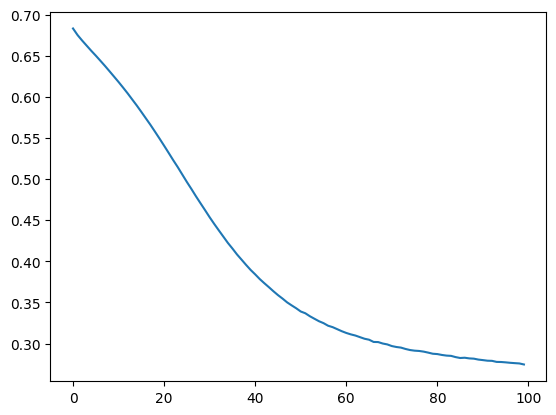

In [21]:
plt.plot(hist.history['loss'])

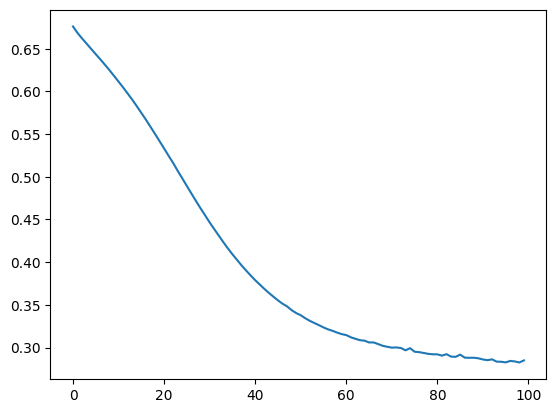

In [22]:
plt.plot(hist.history['val_loss'])

Text(0.5, 1.0, 'Model loss')

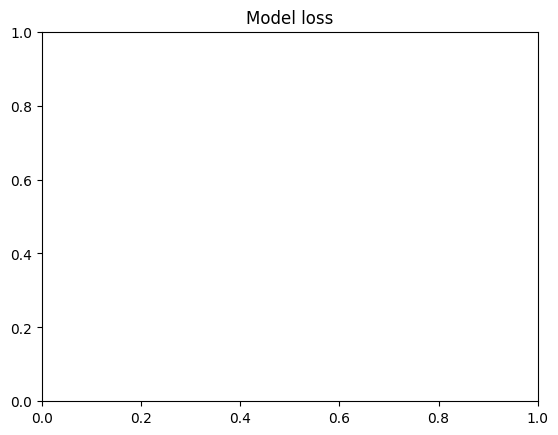

In [23]:
plt.title('Model loss')

Text(0, 0.5, 'Loss')

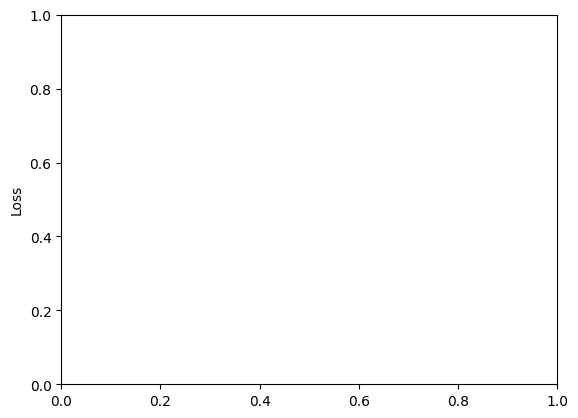

In [24]:
plt.ylabel('Loss')

Text(0.5, 0, 'Epoch')

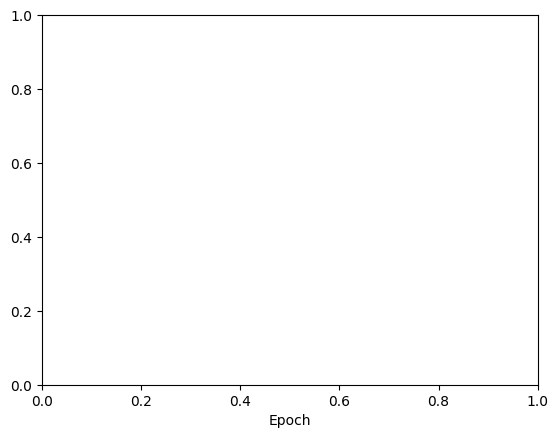

In [25]:
plt.xlabel('Epoch')

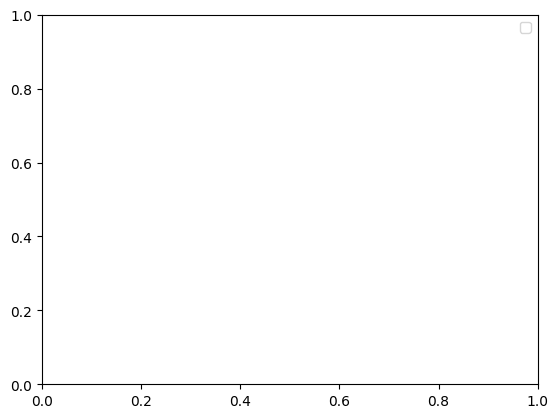

In [26]:
plt.legend(['Train', 'Val'], loc='upper right')

In [27]:
plt.show()

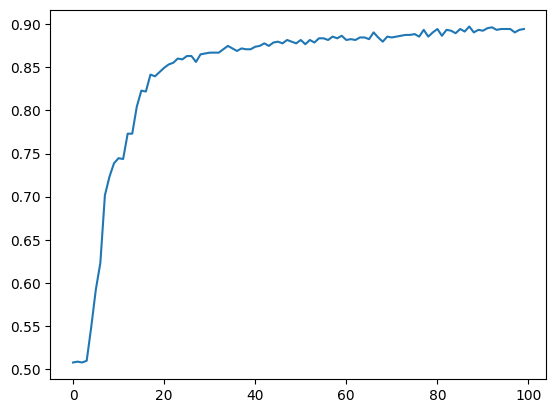

In [31]:
plt.plot(hist.history['accuracy'])

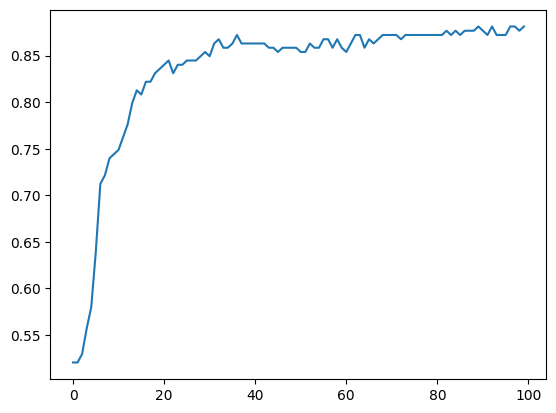

In [33]:
plt.plot(hist.history['val_accuracy'])

Text(0.5, 1.0, 'Model accuracy')

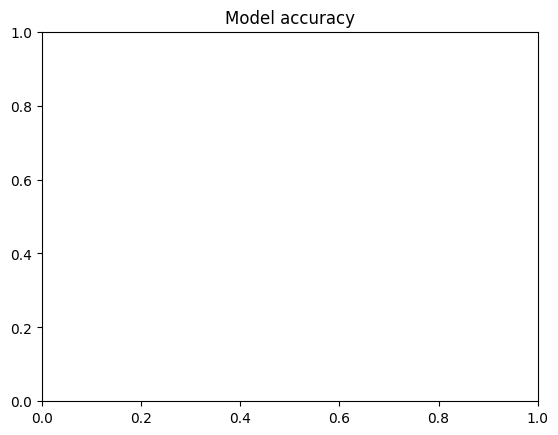

In [34]:
plt.title('Model accuracy')

Text(0, 0.5, 'Accuracy')

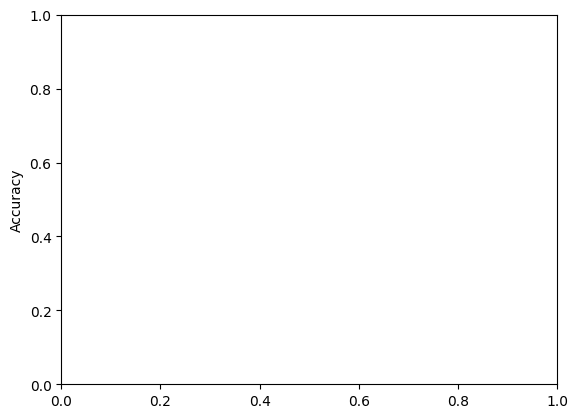

In [35]:
plt.ylabel('Accuracy')

Text(0.5, 0, 'Epoch')

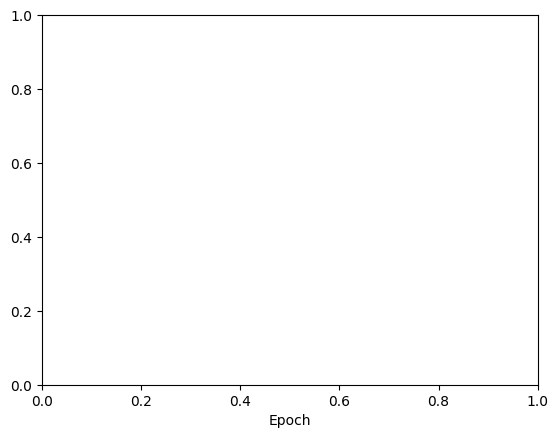

In [36]:
plt.xlabel('Epoch')

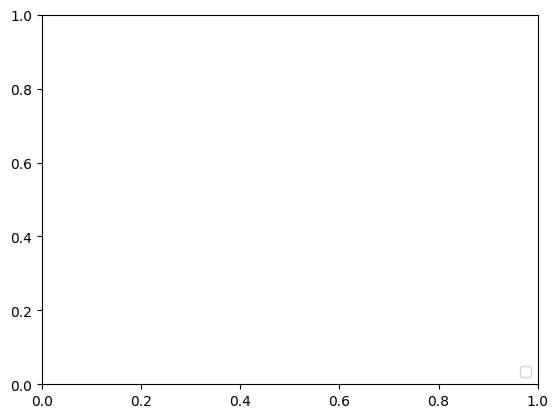

In [37]:
plt.legend(['Train', 'Val'], loc='lower right')

In [52]:
plt.show()

In [39]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 49ms/step - loss: 0.4953 - accuracy: 0.7789 - val_loss: 0.4593 - val_accuracy: 0.7763
Epoch 2/100
32/32 [==============================] - 1s 46ms/step - loss: 0.3475 - accuracy: 0.8562 - val_loss: 0.3598 - val_accuracy: 0.8447
Epoch 3/100
32/32 [==============================] - 1s 41ms/step - loss: 0.3011 - accuracy: 0.8826 - val_loss: 0.3400 - val_accuracy: 0.8539
Epoch 4/100
32/32 [==============================] - 1s 41ms/step - loss: 0.3188 - accuracy: 0.8826 - val_loss: 0.3023 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 2s 50ms/step - loss: 0.2810 - accuracy: 0.8953 - val_loss: 0.3085 - val_accuracy: 0.8858
Epoch 6/100
32/32 [==============================] - 2s 62ms/step - loss: 0.2642 - accuracy: 0.8992 - val_loss: 0.2604 - val_accuracy: 0.8813
Epoch 7/100
32/32 [==============================] - 2s 53ms/step - loss: 0.2973 - accuracy: 0.8718 - val_loss: 0.3865 - val_accuracy: 0.8082
Epoch 

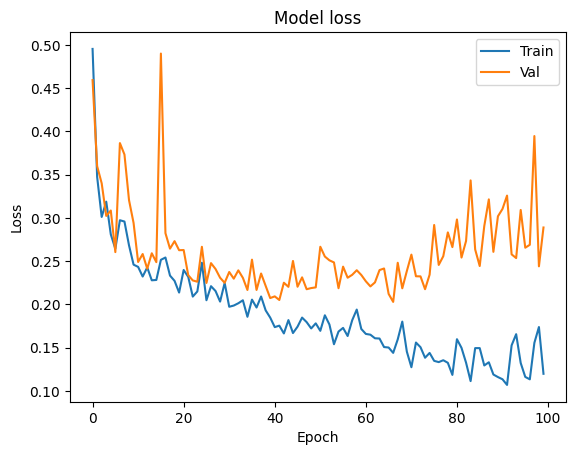

In [40]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

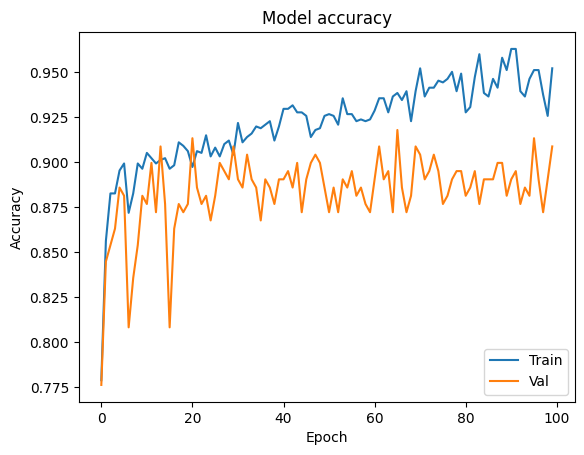

In [43]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [44]:
from keras.layers import Dropout
from keras import regularizers

In [48]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
from google.colab import files
uploaded = files.upload()

In [56]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 5s 90ms/step - loss: 14.2537 - accuracy: 0.6262 - val_loss: 3.9301 - val_accuracy: 0.6438
Epoch 2/100
32/32 [==============================] - 2s 47ms/step - loss: 1.6740 - accuracy: 0.8317 - val_loss: 0.6435 - val_accuracy: 0.8813
Epoch 3/100
32/32 [==============================] - 2s 49ms/step - loss: 0.5892 - accuracy: 0.8493 - val_loss: 0.6301 - val_accuracy: 0.7808
Epoch 4/100
32/32 [==============================] - 2s 48ms/step - loss: 0.5451 - accuracy: 0.8464 - val_loss: 0.4874 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 2s 49ms/step - loss: 0.4817 - accuracy: 0.8826 - val_loss: 0.4741 - val_accuracy: 0.8767
Epoch 6/100
32/32 [==============================] - 2s 50ms/step - loss: 0.4895 - accuracy: 0.8699 - val_loss: 0.4895 - val_accuracy: 0.8630
Epoch 7/100
32/32 [==============================] - 2s 52ms/step - loss: 0.4722 - accuracy: 0.8826 - val_loss: 0.4655 - val_accuracy: 0.8767
Epoch

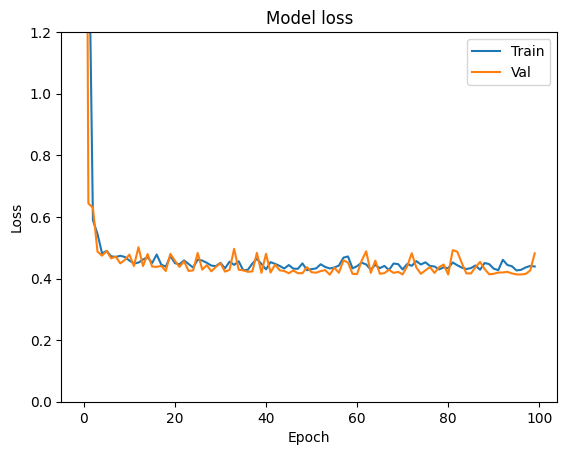

In [57]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

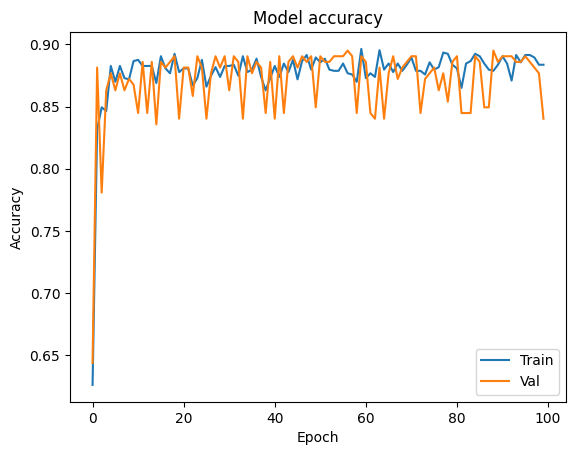

In [59]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()